[bnlearn] >Warning: Computing DAG with 14 nodes can take a very long time!
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


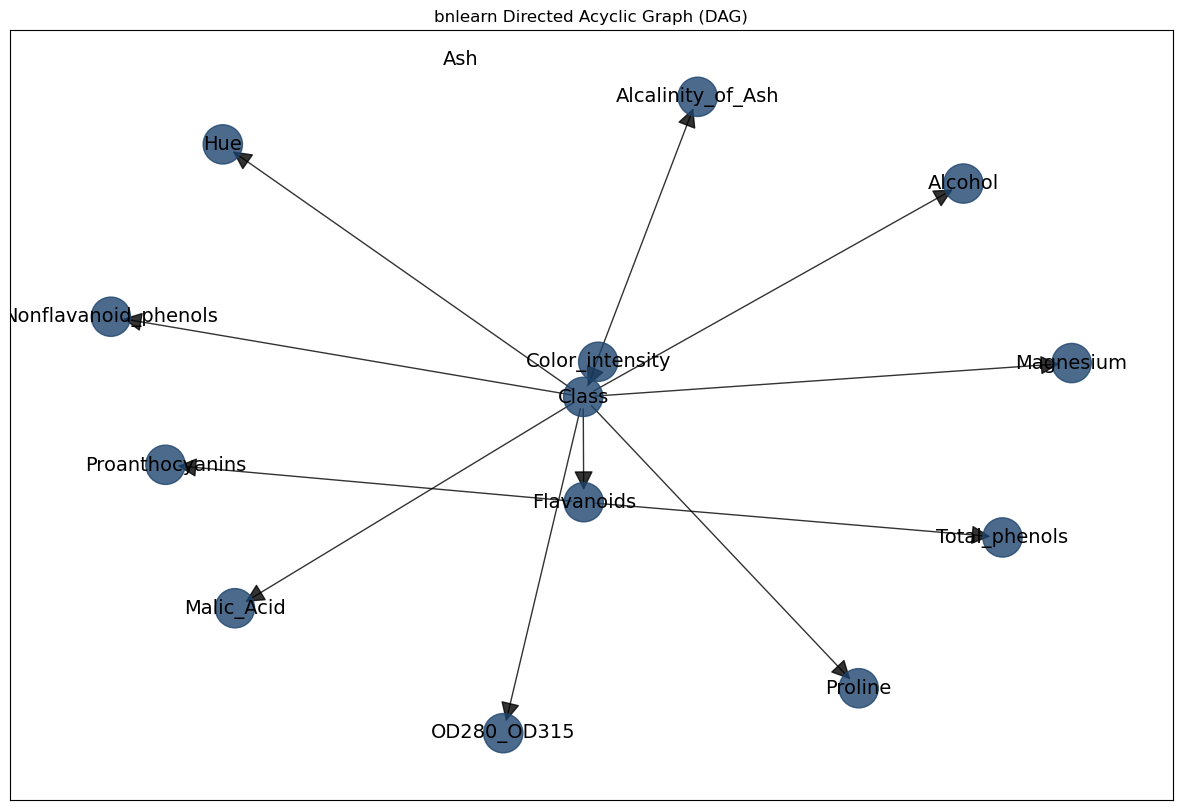

[bnlearn] >Warning: Computing DAG with 14 nodes can take a very long time!
[bnlearn] >Computing best DAG using [tan]


Building tree:   0%|          | 0/91.0 [00:00<?, ?it/s]

[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Alcohol:
+------------+---------------------+---------------------+---------------------+
| Class      | Class(1)            | Class(2)            | Class(3)            |
+------------+---------------------+---------------------+---------------------+
| Alcohol(0) | 0.22381378692927484 | 0.29304347826086957 | 0.23774954627949182 |
+------------+---------------------+---------------------+---------------------+
| Alcohol(1) | 0.23724261414503134 | 0.2643478260869565  | 0.2540834845735027  |
+------------+---------------------+---------------------+---------------------+
| Alcohol(2) | 0.25872873769024174 | 0.22260869565217392 | 0.25680580762250454 |
+------------+---------------------+------------------

100%|██████████| 54/54 [00:00<00:00, 179.72it/s]


Accuracy: 0.9259259259259259


In [8]:
import pandas as pd
import bnlearn as bn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the data
data = pd.read_csv('wine.csv')

# Define column names
column_names = ['Class', 'Alcohol', 'Malic_Acid', 'Ash', 'Alcalinity_of_Ash', 
                'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 
                'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280_OD315', 'Proline']
data.columns = column_names

# Discretize the data
discretized_data = data.copy()
for col in data.columns[1:]:
    discretized_data[col] = pd.qcut(data[col], 4, labels=False, duplicates='drop')


structure1 = bn.structure_learning.fit(discretized_data)

bn.plot(structure1)
X = discretized_data.drop('Class', axis=1)
y = discretized_data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_set = pd.concat([X_train,y_train],axis=1)
test_set = pd.concat([X_test,y_test],axis=1)

model = bn.structure_learning.fit(train_set, methodtype="tan", root_node="Alcohol", class_node="Class")
model_A = bn.parameter_learning.fit(model, train_set)

y_pred = bn.predict(model_A, X_test, variables='Class')

# Print the predicted values
# print(y_pred['Class'])
# print(y_test)
# # Calculate accuracy
# for i in y_pred:
#     print(i)
accuracy = accuracy_score(y_test, y_pred['Class'])
print(f"Accuracy: {accuracy}")


[bnlearn] >Warning: Computing DAG with 14 nodes can take a very long time!
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


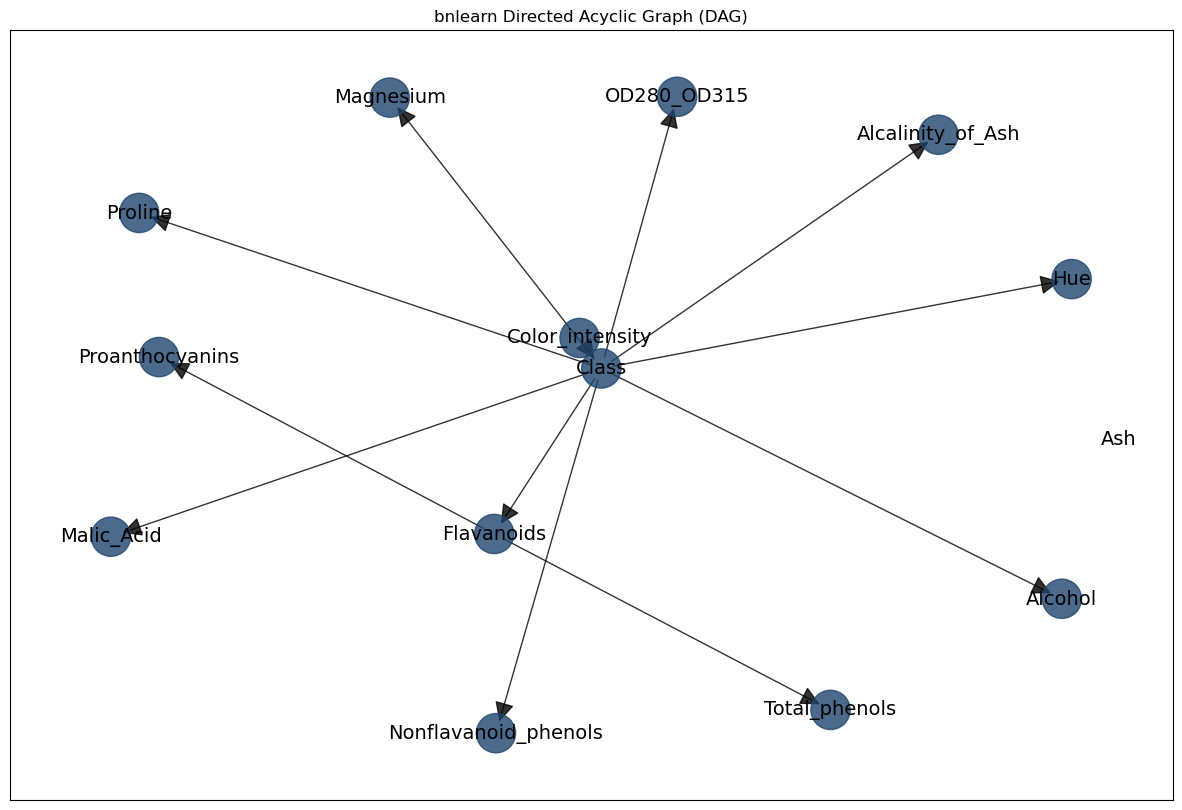

[bnlearn] >Compute edge strength with [chi_square]
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Converting source-target into adjacency matrix..
[bnlearn] >Making the matrix symmetric..
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model
[bnlearn] >Existing coordinates from <pos> are used.


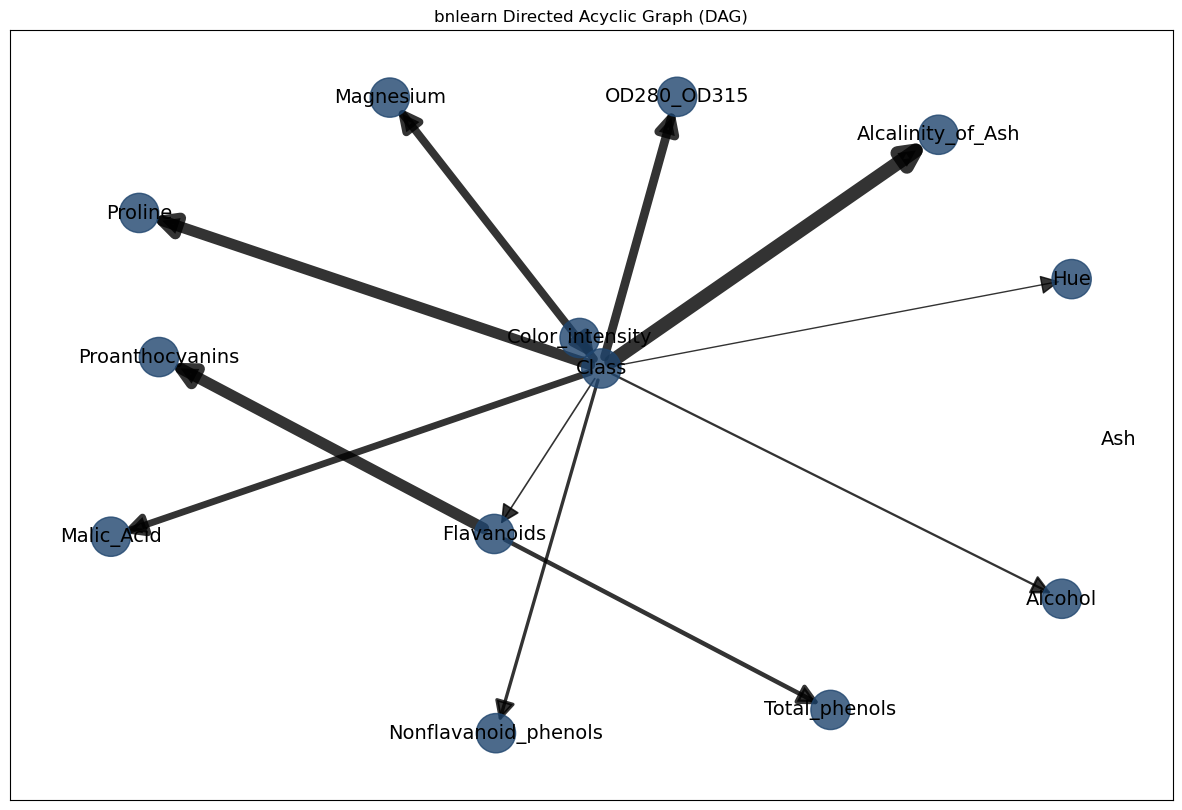

    source           target                stat_test        p_value    chi_square    dof
--  ---------------  --------------------  -----------  -----------  ------------  -----
 0  Class            Flavanoids            True         2.76136e-39      194.535       6
 1  Class            Proline               True         1.68901e-32      162.572       6
 2  Class            OD280_OD315           True         2.5545e-27       138.074       6
 3  Class            Hue                   True         2.10061e-25      128.987       6
 4  Class            Alcohol               True         6.96557e-23      116.995       6
 5  Class            Alcalinity_of_Ash     True         1.72727e-12       66.945       6
 6  Class            Malic_Acid            True         7.33944e-15       78.4857      6
 7  Class            Magnesium             False        4.99726e-11       59.7764      6
 8  Class            Nonflavanoid_phenols  False        2.10021e-10       56.7009      6
 9  Flavanoids       

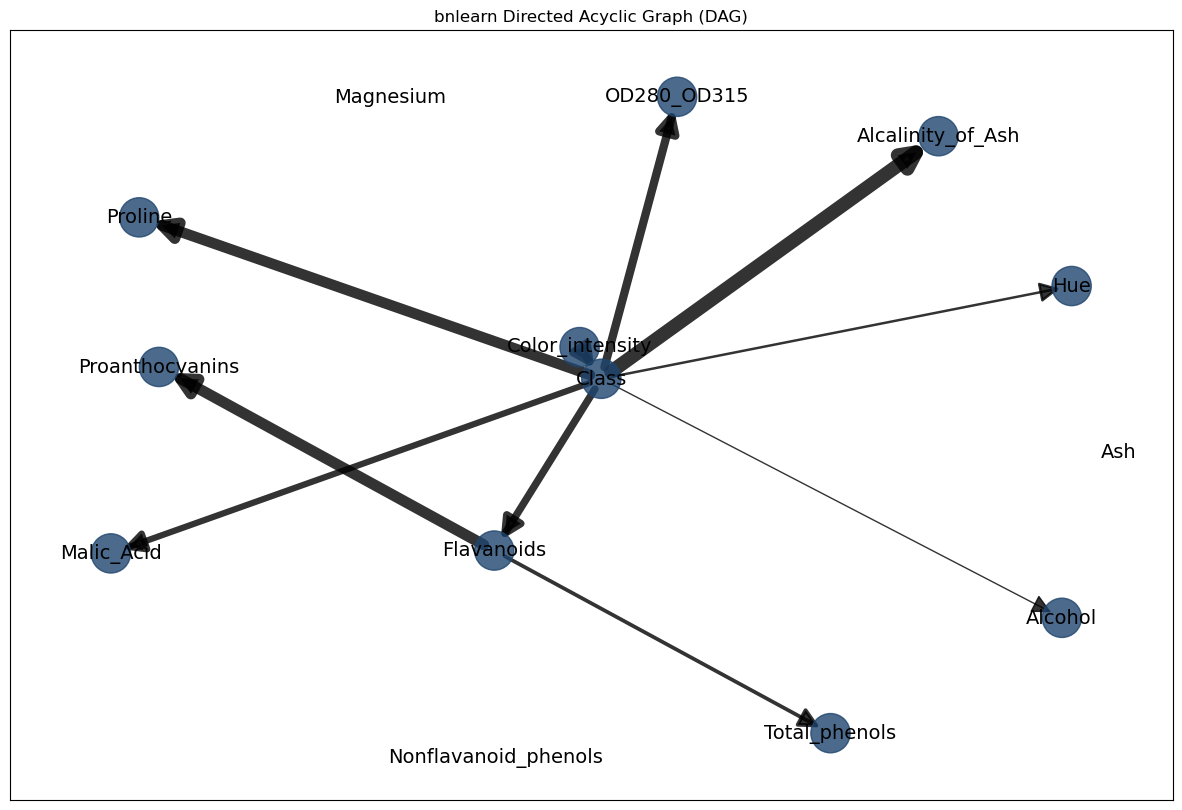

[bnlearn] >Warning: Computing DAG with 12 nodes can take a very long time!
[bnlearn] >Computing best DAG using [tan]


Building tree:   0%|          | 0/66.0 [00:00<?, ?it/s]

[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Alcohol:
+------------+---------------------+---------------------+---------------------+
| Class      | Class(1)            | Class(2)            | Class(3)            |
+------------+---------------------+---------------------+---------------------+
| Alcohol(0) | 0.22084805653710246 | 0.30059777967549106 | 0.23392857142857143 |
+------------+---------------------+---------------------+---------------------+
| Alcohol(1) | 0.23409893992932862 | 0.26473099914602904 | 0.2580357142857143  |
+------------+---------------------+---------------------+---------------------+
| Alcohol(2) | 0.26060070671378094 | 0.21861656703672075 | 0.26071428571428573 |
+------------+---------------------+------------------

100%|██████████| 36/36 [00:00<00:00, 175.91it/s]

Accuracy: 0.9722222222222222


In [9]:
from tabulate import tabulate
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

model = bn.structure_learning.fit(discretized_data, methodtype='hc', scoretype='bic')
G = bn.plot(model)

modelA = bn.independence_test(model, discretized_data, alpha=0.5e-11, prune=False)
bn.plot(modelA, pos=G['pos'])

print(tabulate(modelA['independence_test'], headers="keys"))

modelB = bn.independence_test(model, discretized_data, alpha=0.5e-11, prune=True)
bn.plot(modelB, pos=G['pos'])
edges_remove = ['Magnesium', 'Nonflavanoid_phenols']
pruned_data = discretized_data.drop(columns=edges_remove,axis=1)

PX = pruned_data.drop('Class', axis=1)
Py = pruned_data['Class']
PX_train, PX_test, Py_train, Py_test = train_test_split(PX, Py, test_size=0.2, random_state=42)

Ptrain_set = pd.concat([PX_train,Py_train],axis=1)
Ptest_set = pd.concat([PX_test,Py_test],axis=1)

Pmodel = bn.structure_learning.fit(Ptrain_set, methodtype="tan", root_node="Alcohol", class_node="Class")
model_P = bn.parameter_learning.fit(Pmodel, Ptrain_set)

Py_pred = bn.predict(model_P, PX_test, variables='Class')

# Print the predicted values
# print(y_pred['Class'])
# print(y_test)
# # Calculate accuracy
# for i in y_pred:
#     print(i)
Accuracy = accuracy_score(Py_test, Py_pred['Class'])
print(f"Accuracy: {Accuracy}")


